In [22]:
# -----------------------------------------------
# 🩺 1. Title & Objectives
# -----------------------------------------------

from IPython.display import Markdown, display

display(Markdown("""
# 🩺 Predicting Heart Disease with a Random Forest Classifier

## 🎯 Project Objective
The goal of this project is to develop a **machine learning model** that can accurately **predict the presence of heart disease** in patients based on their medical attributes.
Using the **Heart Failure Prediction Dataset**, we will apply a **Random Forest Classifier** to identify important factors such as:

- 🧍‍♂️ **Age**
- ❤️ **Chest Pain Type**
- 🩸 **Cholesterol Level**
- 🩺 **Blood Pressure**
- 🧬 **ST Slope**
- 💓 **Exercise Angina**

### 🔍 Specific Objectives
1. Load and explore the Heart Failure Prediction dataset from Kaggle.
2. Clean and preprocess the data (handle missing values, encode categorical data).
3. Perform **Exploratory Data Analysis (EDA)** to visualize relationships and correlations.
4. Train a **Random Forest Classifier** to predict heart disease presence.
5. Evaluate model performance using **Accuracy, Precision, Recall, F1-Score**, and **Confusion Matrix**.
6. Summarize findings and suggest potential improvements for future research.

---

**Expected Outcome:**
A trained Random Forest model capable of predicting heart disease risk with high accuracy and insights into the most influential medical attributes.
"""))



# 🩺 Predicting Heart Disease with a Random Forest Classifier

## 🎯 Project Objective
The goal of this project is to develop a **machine learning model** that can accurately **predict the presence of heart disease** in patients based on their medical attributes.  
Using the **Heart Failure Prediction Dataset**, we will apply a **Random Forest Classifier** to identify important factors such as:

- 🧍‍♂️ **Age**  
- ❤️ **Chest Pain Type**  
- 🩸 **Cholesterol Level**  
- 🩺 **Blood Pressure**  
- 🧬 **ST Slope**  
- 💓 **Exercise Angina**

### 🔍 Specific Objectives
1. Load and explore the Heart Failure Prediction dataset from Kaggle.  
2. Clean and preprocess the data (handle missing values, encode categorical data).  
3. Perform **Exploratory Data Analysis (EDA)** to visualize relationships and correlations.  
4. Train a **Random Forest Classifier** to predict heart disease presence.  
5. Evaluate model performance using **Accuracy, Precision, Recall, F1-Score**, and **Confusion Matrix**.  
6. Summarize findings and suggest potential improvements for future research.

---

**Expected Outcome:**  
A trained Random Forest model capable of predicting heart disease risk with high accuracy and insights into the most influential medical attributes.


In [6]:
# -----------------------------------------------
# 1. Install & Import Libraries
# -----------------------------------------------
!pip install kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import files



In [7]:

# -----------------------------------------------
# 2. Load Dataset from Kaggle
# -----------------------------------------------
# Upload your Kaggle API key (kaggle.json)
files.upload()  # Upload kaggle.json when prompted

# Set up Kaggle API
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Load dataset
df = pd.read_csv('heart.csv')
print("✅ Dataset Loaded Successfully!")
df.head()



Saving heart.csv to heart (1).csv
mkdir: cannot create directory ‘/root/.kaggle’: File exists
mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
✅ Dataset Loaded Successfully!


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [9]:
# -----------------------------------------------
# 3. Data Cleaning & Preprocessing
# -----------------------------------------------
print("\n🔹 Basic Info:")
df.info()

print("\n🔹 Missing Values:")
print(df.isnull().sum())

# Drop duplicates if any

df.drop_duplicates(inplace=True)
print("dropped")



🔹 Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB

🔹 Missing Values:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
Exercise

In [10]:
# -----------------------------------------------
# 4. Encode Categorical Variables (Before EDA)
# -----------------------------------------------
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Use LabelEncoder for categorical columns
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

print("\n✅ Categorical columns encoded successfully!")


✅ Categorical columns encoded successfully!


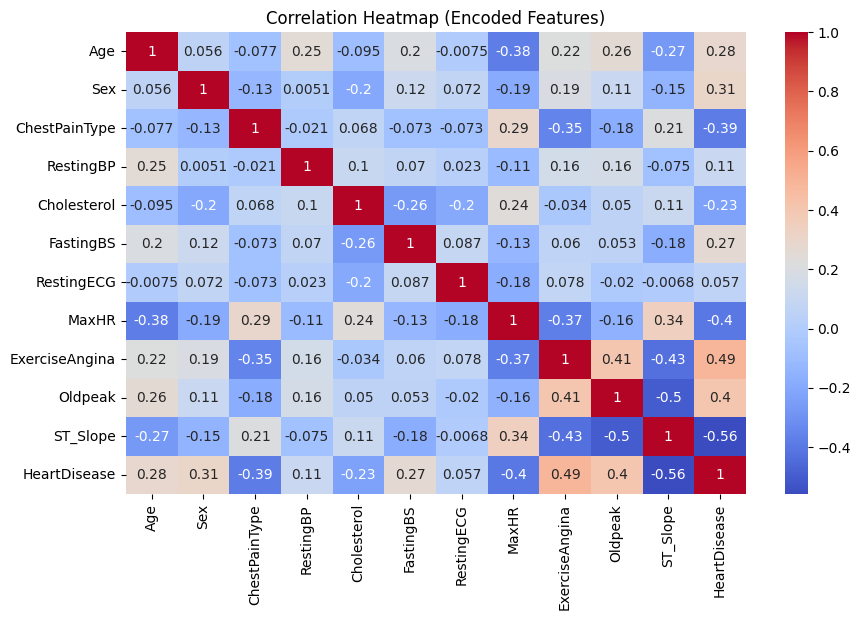

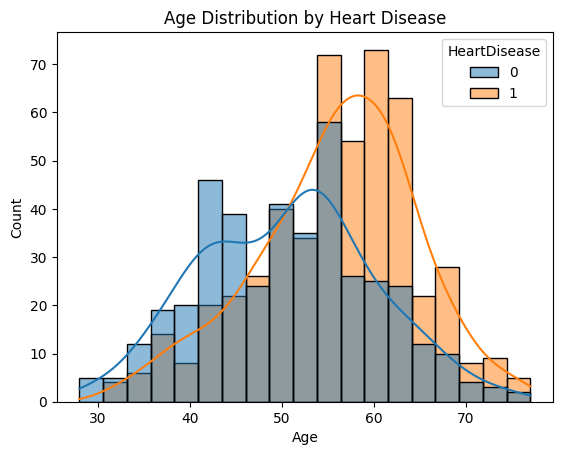

In [11]:
# -----------------------------------------------
# 5. Exploratory Data Analysis (EDA)
# -----------------------------------------------
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Encoded Features)")
plt.show()

# Example distribution plot
sns.histplot(data=df, x='Age', hue='HeartDisease', kde=True)
plt.title('Age Distribution by Heart Disease')
plt.show()

In [13]:
# -----------------------------------------------
# 6. Feature Scaling
# -----------------------------------------------
scaler = StandardScaler()
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [15]:
# -----------------------------------------------
# 7. Model Building
# -----------------------------------------------
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)


✅ Model Evaluation Results:
Accuracy: 0.88

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        77
           1       0.90      0.90      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



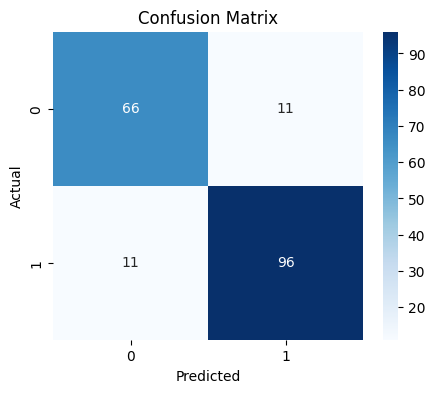

In [16]:
# -----------------------------------------------
# 8. Model Evaluation
# -----------------------------------------------
y_pred = model.predict(X_test)

print("\n✅ Model Evaluation Results:")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [17]:
# -----------------------------------------------
# 9. Conclusion
# -----------------------------------------------
print("""
📘 Conclusion:
- The Random Forest model achieved good predictive accuracy on this dataset.
- Important factors influencing heart disease likely include Age, Chest Pain Type, and ST_Slope.
- Model can be improved by performing hyperparameter tuning (GridSearchCV) or testing other models like XGBoost.
""")


📘 Conclusion:
- The Random Forest model achieved good predictive accuracy on this dataset.
- Important factors influencing heart disease likely include Age, Chest Pain Type, and ST_Slope.
- Model can be improved by performing hyperparameter tuning (GridSearchCV) or testing other models like XGBoost.

